<a href="https://colab.research.google.com/github/tackulus/204426/blob/main/Lab_07_610510531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Workshop 7: Outlier Detection**
**คำสั่ง**

1.   ศึกษาวิธีการเติมข้อมูลสูญหายเบื้องต้นต่อไปนี้
2.   ทำการเติมข้อมูลสูญหายทุกตัวแปรด้วยวิธีที่เหมาะสม 
3.   ตั้งชื่อไฟล์ python notebook นี้ในรูปแบบ Lab_06_XXXXXXXXX.ipynb โดย XXXXXXXXX คือ รหัสนักศึกษา
4.   ทำการดาวน์โหลดและส่งไฟล์ Lab_06_XXXXXXXXX.ipynb ที่เว็บไซต์ http://hw.cs.science.cmu.ac.th 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

In [ ]:
data = pd.read_csv("weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


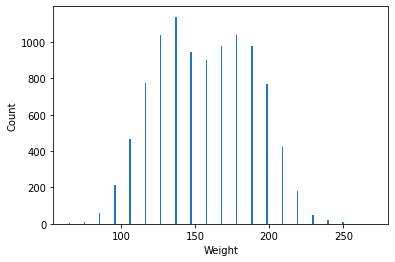

In [ ]:
plt.hist(data.Weight, bins=20, width=1)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [ ]:
data.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

**Outlier Detection using Z-score**

In [ ]:
# detect extreme values of weight
threshold = 3

# calculate z-score of each data
data['zscore'] = (data.Weight - data.Weight.mean()) / data.Weight.std()

# find the data that the z-score is not in [-threshold, threshold]
data[(data['zscore']>threshold) | (data['zscore']< -1*threshold)]

,Gender,Height,Weight,zscore
2014,Male,78.998742,269.989699,3.380711
9285,Female,54.263133,64.700127,-3.012922


ปฏิบัติการข้อ 1) ใช้วิธีการตรวจหาข้อมูลผิดปรกติด้วยวิธี z-score เพื่อตรวจหาข้อมูลผิดปรกติของค่าตัวแปรความสูง

In [ ]:
# Answer here!

**Outlier Detection using DBSCAN**

In [ ]:
clusterInd = DBSCAN(eps = 5, min_samples = 5).fit_predict(data.loc[:,['Weight']])
np.unique(clusterInd)  # -1 is noise

# retrieve the data that its cluster is -1
data[clusterInd == -1]

,Gender,Height,Weight,zscore
2014,Male,78.998742,269.989699,3.380711
5360,Female,55.668202,68.982530,-2.879549
6624,Female,54.616858,71.393749,-2.804453
9285,Female,54.263133,64.700127,-3.012922


ปฏิบัติการข้อ 2) ใช้วิธีการตรวจหาข้อมูลผิดปรกติด้วยวิธี DBSCAN เพื่อตรวจหาข้อมูลผิดปรกติของค่าตัวแปรความสูง

In [ ]:
# Answer here!

**Outlier Detection using isolation forest**

In [ ]:
# training the model
iforest = IsolationForest(n_estimators = 100).fit(data.loc[:,['Weight']])
scores = iforest.score_samples(data.loc[:,['Weight']])
print(np.min(scores),np.max(scores))

-0.7701558995979635 -0.448417621088503


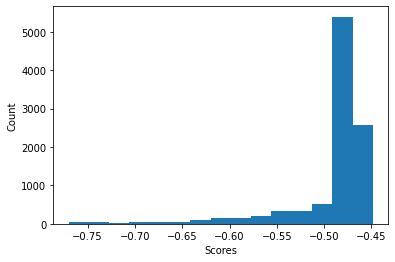

In [ ]:
plt.hist(scores, bins=15)
plt.xlabel('Scores')
plt.ylabel('Count')
plt.show()

In [ ]:
threshold = -0.76
# retrieve the data that its score is lower than threshold
data[scores < threshold]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,2.935380
1506,Male,75.698618,249.565628,2.744614
1610,Male,76.617546,255.863326,2.940752
1750,Male,74.604668,249.946283,2.756469
2014,Male,78.998742,269.989699,3.380711
2070,Male,77.465569,252.556689,2.837769
2971,Male,75.156879,250.317151,2.768020
3285,Male,78.528210,253.889004,2.879263
3669,Male,77.008336,251.425051,2.802525
3909,Male,77.067355,249.110242,2.730431


ปฏิบัติการข้อ 3) ใช้วิธีการตรวจหาข้อมูลผิดปรกติด้วย isolation forest เพื่อตรวจหาข้อมูลผิดปรกติของค่าตัวแปรความสูง

In [ ]:
# Answer here!